In [1]:
import os
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FOLDER = os.path.abspath('data_clean.csv')
data = pd.read_csv(FOLDER)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
data.shape

(342, 7)

In [4]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,342,342,342.000000,342.000000,342.000000,342.000000,342
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,FEMALE
freq,151,167,NaN,NaN,NaN,NaN,174
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
data_test =  data.sample(frac=0.3)
data_train  = data.drop(data_test.index,axis=0)

In [8]:
# Cambio los datos categoricos para datos numericos
cols_cat = data.select_dtypes(include=['object']).columns.to_list()
cols_cat.remove('species')
oc = OrdinalEncoder()

train_encode = oc.fit_transform(data_train[cols_cat])
test_encode = oc.transform(data_test[cols_cat])

In [9]:
# Cambio el rango de los datos numericos
cols_num = data.select_dtypes(include=['int', 'float']).columns.to_list()

minmax = MinMaxScaler()

train_scaled = minmax.fit_transform(data_train[cols_num])
test_scaled = minmax.transform(data_test[cols_num])

In [10]:
data_train_f = pd.DataFrame(np.concatenate((train_encode,train_scaled), axis=1))
data_test_f = pd.DataFrame(np.concatenate((test_encode, test_scaled), axis=1))

In [11]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1)
gbc.fit(data_train_f, data_train['species'])

GradientBoostingClassifier(max_depth=5, random_state=1)

In [12]:
gbc_pred = gbc.predict(data_test_f)
gbc_eval = gbc.predict(data_train_f)

In [13]:
analise = pd.DataFrame({'valores':data_test['species'], 'prevision':gbc_pred.squeeze()})

In [14]:
cm = confusion_matrix(analise['valores'], analise['prevision'], labels=data['species'].unique())
cm_diplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['species'].unique())

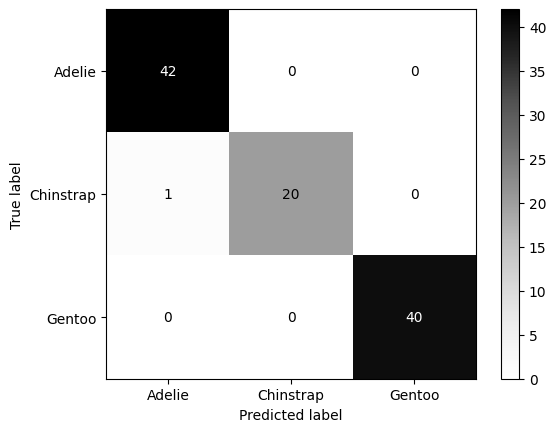

In [15]:
cm_diplay.plot(cmap='Greys')

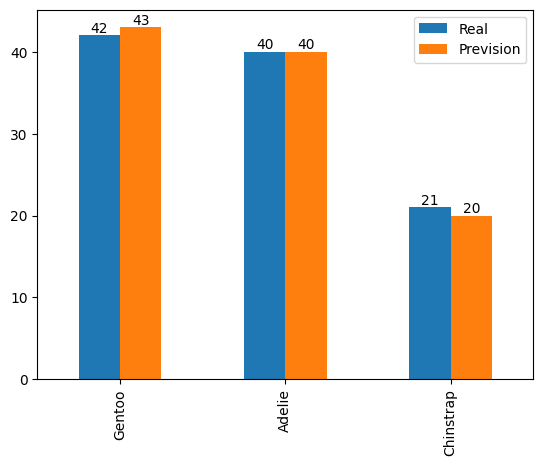

In [16]:
analise['prevision'].value_counts().to_list()
plot = pd.DataFrame({'Real': analise['valores'].value_counts().to_list(), 
                     'Prevision': analise['prevision'].value_counts().to_list()},
                    index=analise['valores'].unique())
ax =plot.plot(kind='bar')

for container in ax.containers: #type: ignore
    ax.bar_label(container)

In [17]:
print(classification_report(analise['valores'], analise['prevision']))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        42
   Chinstrap       1.00      0.95      0.98        21
      Gentoo       1.00      1.00      1.00        40

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103

